In [2]:
import pylab as pl
import numpy as np
import matplotlib.mlab as ml
from scipy import interpolate
from collections import OrderedDict
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Roman"]})


plt.rcParams["figure.dpi"]=150
plt.rcParams["figure.facecolor"]="white"
plt.rcParams["figure.figsize"]=(8, 6)

# Orbital magnetic moment distribution for different energy levels for $-P$

In [4]:
def response_plot_level(chosen_axis, path_parent, Fermi_energy):
  
  axis = ""
  if chosen_axis == 0:
    axis = "x"
  if chosen_axis == 1:
    axis = "y"
  
  print("Chosen axis: {}".format(chosen_axis))
  
  outfile = "pto-kslice-morb_{}.pdf".format(axis)
  chosen_cmap = "bwr"
  
  val = np.loadtxt('{}/pto-kslice-morb.dat'.format(path_parent), usecols=(chosen_axis,))
  points = np.loadtxt('{}/pto-kslice-coord.dat'.format(path_parent))

  # Avoid numerical noise
  points_x=np.around(points[:,0],decimals=10)
  points_y=np.around(points[:,1],decimals=10)
  num_pt=len(points)

  print(points_x)
  
  area= 2.592924
  
  square= True     

  fig, ax = plt.subplots()

  # ax.annotate('local max', xy=(3, 1),  xycoords='data',
  #             xytext=(0.8, 0.95), textcoords='axes fraction',
  #             arrowprops=dict(facecolor='black', shrink=0.05),
  #             horizontalalignment='right', verticalalignment='top',
  #             )
  
  if square:
    x_coord=list(OrderedDict.fromkeys(points_x))
    y_coord=list(OrderedDict.fromkeys(points_y))
    dimx=len(x_coord)
    dimy=len(y_coord)
  else:
    xmin=np.min(points_x)
    ymin=np.min(points_y)
    xmax=np.max(points_x)
    ymax=np.max(points_y)
    a=np.max(np.array([xmax-xmin,ymax-ymin]))
    num_int=int(round(np.sqrt(num_pt*a**2/area)))
    xint = np.linspace(xmin,xmin+a,num_int)
    yint = np.linspace(ymin,ymin+a,num_int)
  
  # Energy level for isocontours (typically the Fermi level)
  ef = Fermi_energy

  # ef = 6.1605
  
  bands=np.loadtxt('{}/pto-kslice-bands.dat'.format(path_parent))
  numbands=bands.size//num_pt


  if square:
    bbands=bands.reshape((dimy,dimx,numbands))
    for i in range(numbands):
      Z=bbands[:,:,i]
      ax.contour(x_coord,y_coord,Z,[ef],colors='k')
  else:
    bbands=bands.reshape((num_pt,numbands))
    bandint=[]
    grid_x, grid_y = np.meshgrid(xint,yint)
    for i in range(numbands):
      bandint.append(interpolate.griddata((points_x,points_y), bbands[:,i], (grid_x,grid_y), method='nearest'))
      ax.contour(grid_x,grid_y,bandint[i],[ef],colors='black')
  
  if square: 
    Z=val.reshape(dimy,dimx)
    image = ax.imshow(Z,origin='lower',extent=(min(x_coord),max(x_coord),min(y_coord),max(y_coord)), cmap = "{}".format(chosen_cmap))
    #ax.annotate("Some explanation", 0, 0)
  else: 
    valint = ml.griddata(points_x,points_y, val, xint, yint)
    image = ax.imshow(valint,origin='lower',extent=(min(xint),max(xint),min(yint),max(yint)), cmap = "{}".format(chosen_cmap))


  fontSize = 20
  ticksize = 20
  plt.xlabel(r'$k_x$', fontsize = fontSize)
  plt.ylabel(r'$k_y$',fontsize = fontSize)

  cb = fig.colorbar(image)
  cb.ax.tick_params(labelsize=ticksize)
  plt.tick_params(axis='both', which='major', labelsize=ticksize)
  cb.ax.yaxis.get_offset_text().set(size=ticksize)



  point_names = ["\Gamma", "X", "M"]
  points = [(0,0), (0.805, 0), (0.805, 0.805)]
  points_arr = [[0,0], [0.805,0], [0.805, 0.805]]

  for i in range(len(point_names)):
    #ax.annotate(r"${}$".format(point_names[i]),xy = points[i])
    ax.scatter(points_arr[i][0], points_arr[i][1], s= 2)
    ax.text(points[i][0] + 0.01, points[i][1] + 0.01, r"${}$".format(point_names[i]))
  # # Different  High_symmetric points
  # ax.annotate(r"$\Gamma$", xy = (0, 0))
  # ax.annotate(r"$X$", xy = (0.5, 0))
  # ax.annotate(r"$X", xy = (-0.5, 0))
  # ax.annotate
  
  plt.savefig("{}/{}".format(path_parent, outfile), bbox_inches='tight')
  plt.show()

In [10]:
axis_chosen = 1# 0 = x-axis, 1 = y-axis

Chosen axis: 1
[-0.80512801 -0.79707673 -0.78902545 ...  0.78902545  0.79707673
  0.80512801]


/var/folders/2q/502ffcx1407dzp6wzwyyx8lr0000gn/T/ipykernel_42735/2996745317.py:64: UserWarning: No contour levels were found within the data range.
  ax.contour(x_coord,y_coord,Z,[ef],colors='k')


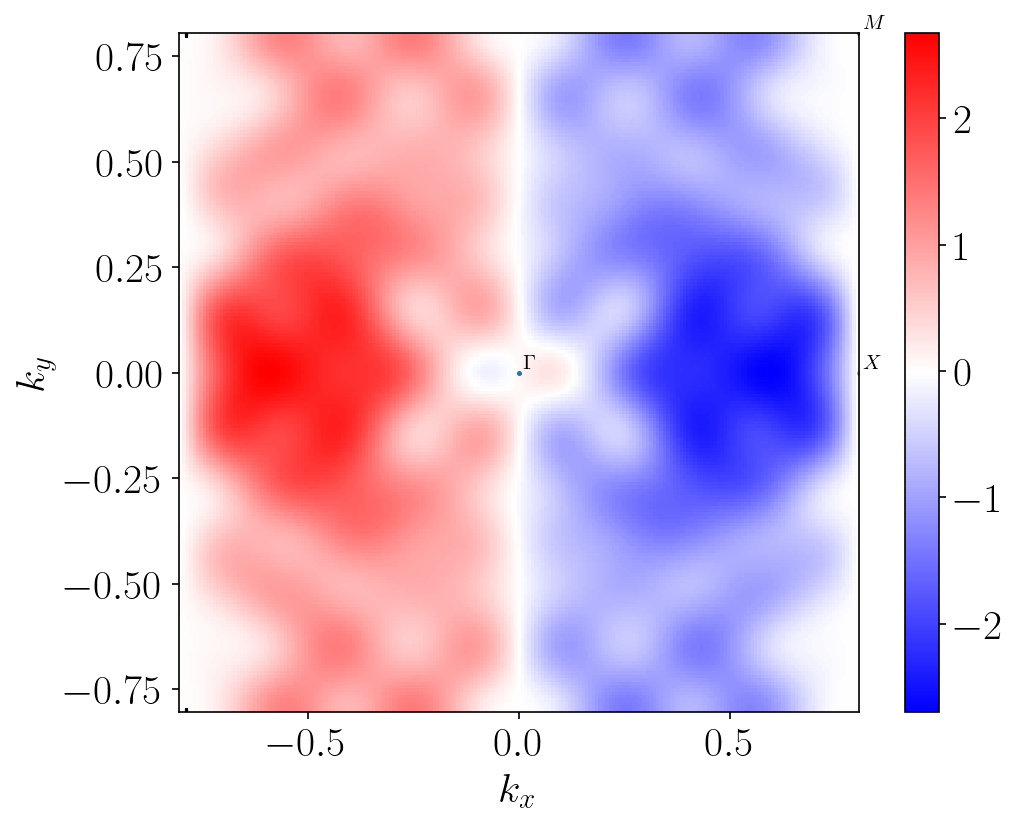

Chosen axis: 1
[-0.80512801 -0.79707673 -0.78902545 ...  0.78902545  0.79707673
  0.80512801]


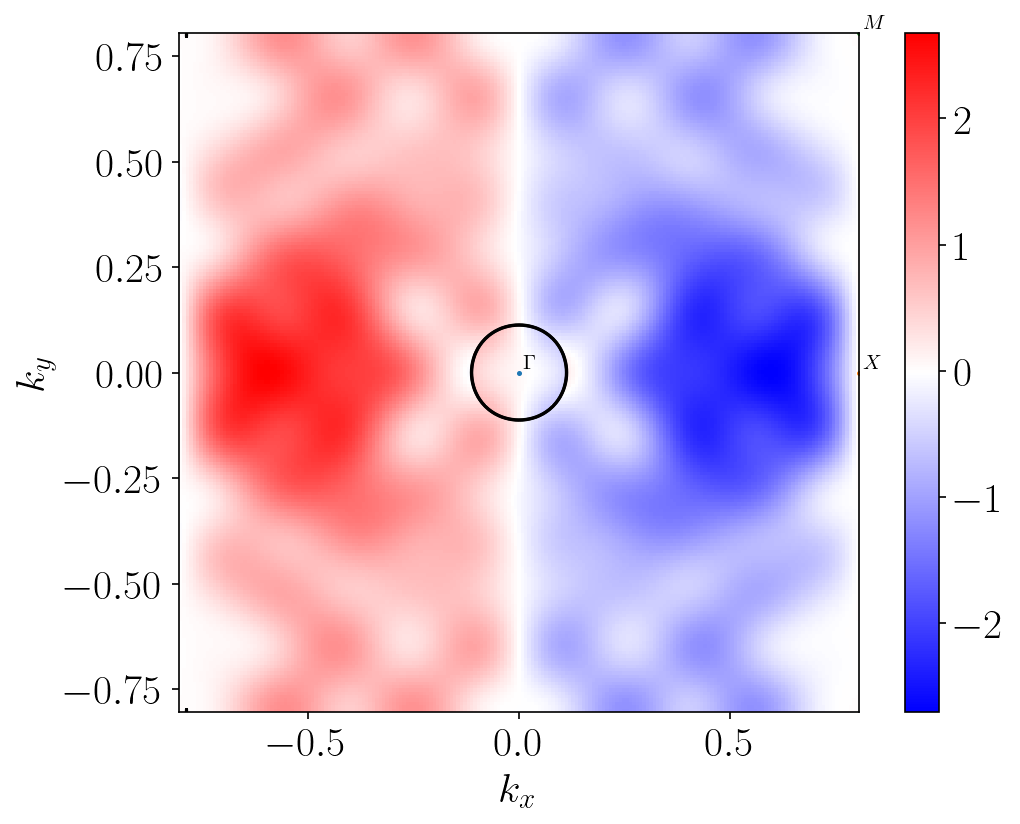

Chosen axis: 1
[-0.80512801 -0.79707673 -0.78902545 ...  0.78902545  0.79707673
  0.80512801]


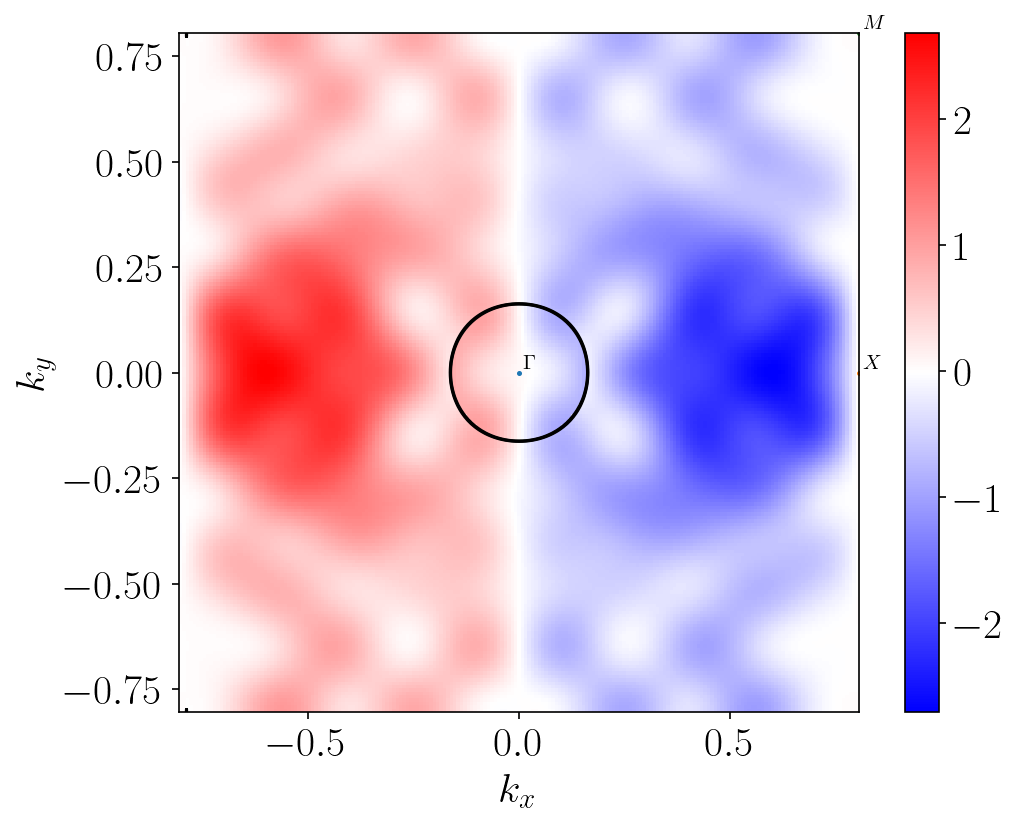

Chosen axis: 1
[-0.80512801 -0.79707673 -0.78902545 ...  0.78902545  0.79707673
  0.80512801]


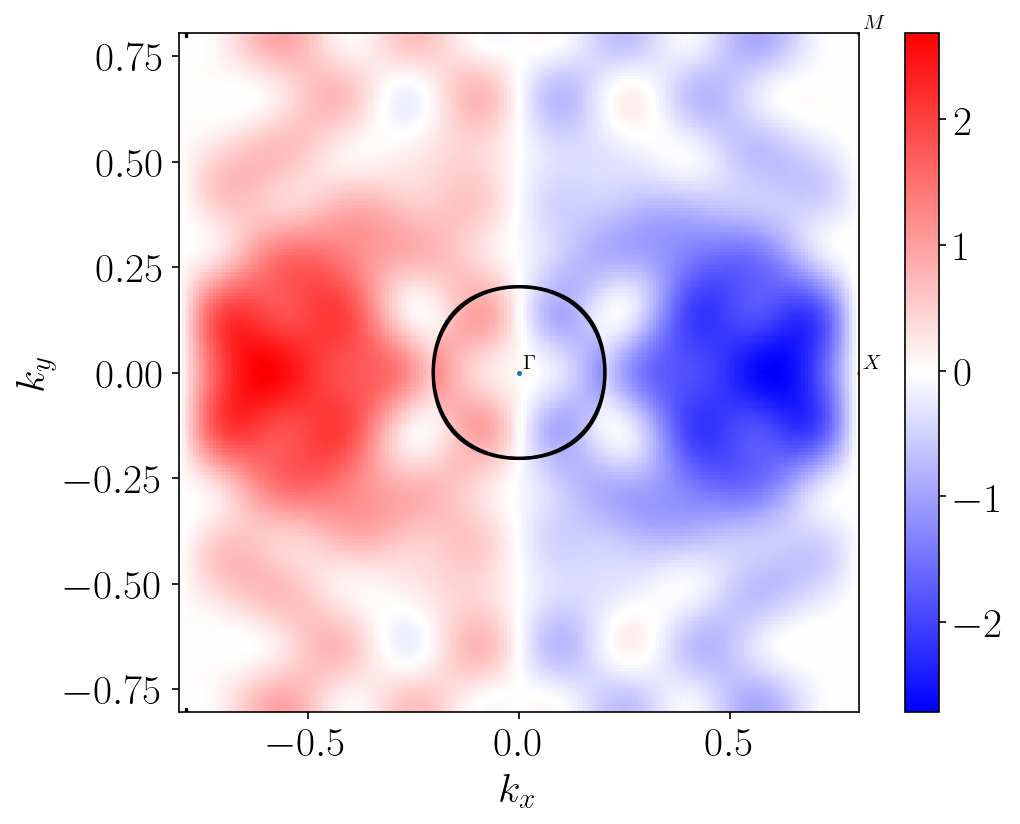

Chosen axis: 1
[-0.80512801 -0.79707673 -0.78902545 ...  0.78902545  0.79707673
  0.80512801]


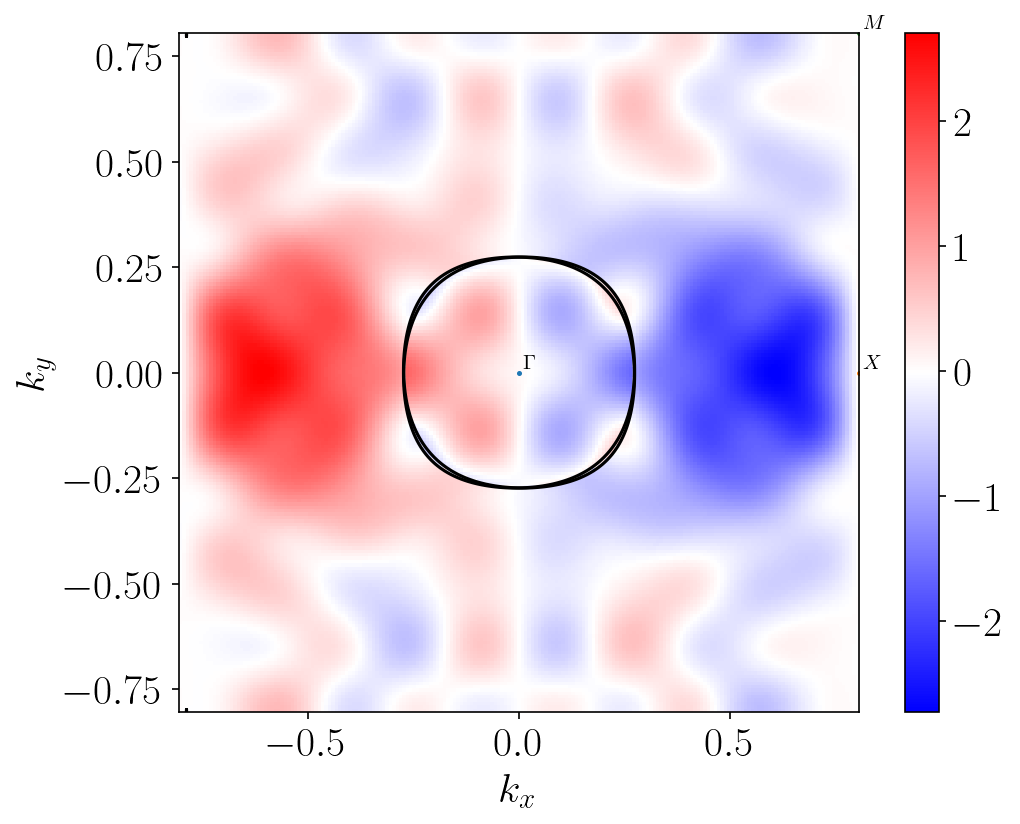

In [11]:
response_plot_level(chosen_axis = axis_chosen, path_parent = "orb_dist_7.9", Fermi_energy = 7.898600)
response_plot_level(chosen_axis = axis_chosen, path_parent = "orb_dist_8", Fermi_energy = 8.0)
response_plot_level(chosen_axis = axis_chosen, path_parent = "orb_dist_8.1", Fermi_energy = 8.101400)
response_plot_level(chosen_axis = axis_chosen, path_parent = "orb_dist_8.2", Fermi_energy = 8.2028)
response_plot_level(chosen_axis = axis_chosen, path_parent = "orb_dist_8.4", Fermi_energy = 8.4056)

## Orbital momentum for crystal structure with opposite direction of electric dipole

Chosen axis: 0
[-0.80512801 -0.79707673 -0.78902545 ...  0.78902545  0.79707673
  0.80512801]


/var/folders/2q/502ffcx1407dzp6wzwyyx8lr0000gn/T/ipykernel_22271/2996745317.py:64: UserWarning: No contour levels were found within the data range.
  ax.contour(x_coord,y_coord,Z,[ef],colors='k')


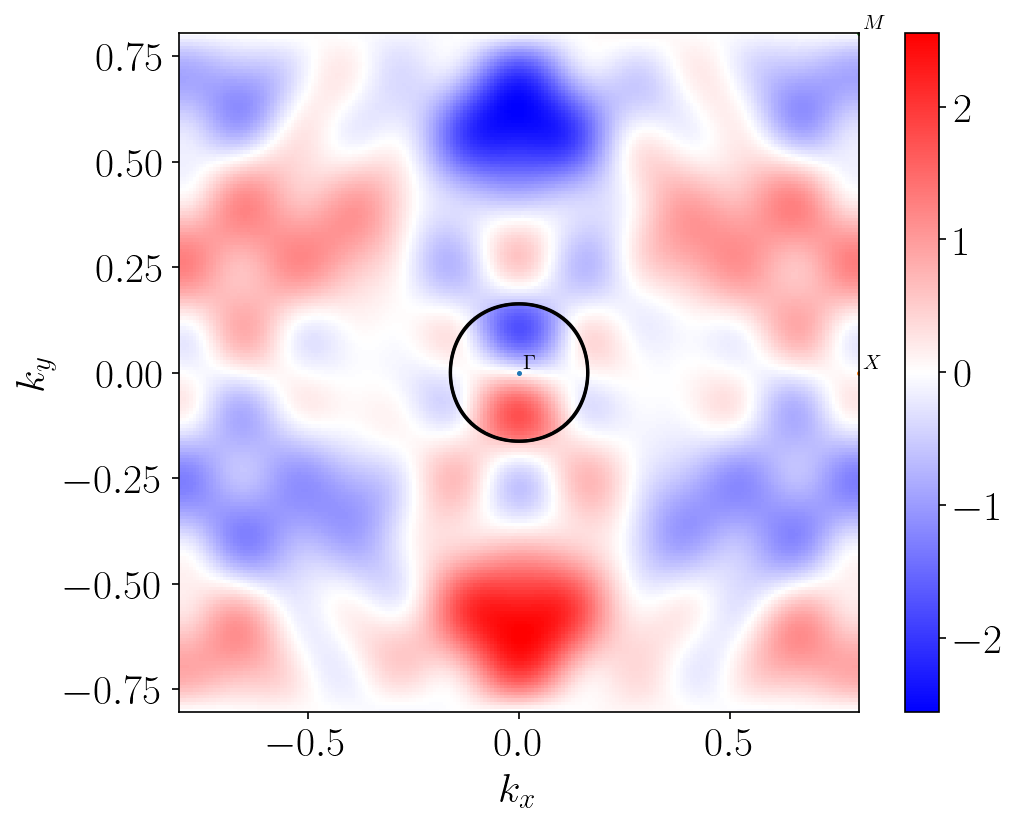

In [40]:
response_plot_level(chosen_axis = axis_chosen, path_parent = "orb_dist_plus_8.09", Fermi_energy = 8.098400)


# Archive Code

In [ ]:
# x = 0, y = 1
outfile = 'pto-kslice-morb_y.pdf'
chosen_cmap = "spectral"


points = np.loadtxt('pto-kslice-coord.dat')

# Avoid numerical noise
points_x=np.around(points[:,0],decimals=10)
points_y=np.around(points[:,1],decimals=10)
num_pt=len(points)

print(points_x)
 
area= 2.592924
 
square= True     

fig, ax = plt.subplots()

# ax.annotate('local max', xy=(3, 1),  xycoords='data',
#             xytext=(0.8, 0.95), textcoords='axes fraction',
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             horizontalalignment='right', verticalalignment='top',
#             )
 
if square:
  x_coord=list(OrderedDict.fromkeys(points_x))
  y_coord=list(OrderedDict.fromkeys(points_y))
  dimx=len(x_coord)
  dimy=len(y_coord)
else:
  xmin=np.min(points_x)
  ymin=np.min(points_y)
  xmax=np.max(points_x)
  ymax=np.max(points_y)
  a=np.max(np.array([xmax-xmin,ymax-ymin]))
  num_int=int(round(np.sqrt(num_pt*a**2/area)))
  xint = np.linspace(xmin,xmin+a,num_int)
  yint = np.linspace(ymin,ymin+a,num_int)
 
# Energy level for isocontours (typically the Fermi level)
ef=    8.000000

# ef = 6.1605
 
bands=np.loadtxt('pto-kslice-bands.dat')
numbands=bands.size//num_pt


if square:
  bbands=bands.reshape((dimy,dimx,numbands))
  for i in range(numbands):
    Z=bbands[:,:,i]
    ax.contour(x_coord,y_coord,Z,[ef],colors='k')
else:
  bbands=bands.reshape((num_pt,numbands))
  bandint=[]
  grid_x, grid_y = np.meshgrid(xint,yint)
  for i in range(numbands):
    bandint.append(interpolate.griddata((points_x,points_y), bbands[:,i], (grid_x,grid_y), method='nearest'))
    ax.contour(grid_x,grid_y,bandint[i],[ef],colors='black')
 

val = np.loadtxt('pto-kslice-morb.dat', usecols=(1,))

 
if square: 
  Z=val.reshape(dimy,dimx)
  image = ax.imshow(Z,origin='lower',extent=(min(x_coord),max(x_coord),min(y_coord),max(y_coord)), cmap = "{}".format(chosen_cmap))
  #ax.annotate("Some explanation", 0, 0)
else: 
  valint = ml.griddata(points_x,points_y, val, xint, yint)
  image = ax.imshow(valint,origin='lower',extent=(min(xint),max(xint),min(yint),max(yint)), cmap = "{}".format(chosen_cmap))


fontSize = 20
ticksize = 20
plt.xlabel(r'$k_x$', fontsize = fontSize)
plt.ylabel(r'$k_y$',fontsize = fontSize)

cb = fig.colorbar(image)
cb.ax.tick_params(labelsize=ticksize)
plt.tick_params(axis='both', which='major', labelsize=ticksize)
cb.ax.yaxis.get_offset_text().set(size=ticksize)



point_names = ["\Gamma", "X", "M"]
points = [(0,0), (0.805, 0), (0.805, 0.805)]
points_arr = [[0,0], [0.805,0], [0.805, 0.805]]

for i in range(len(point_names)):
  #ax.annotate(r"${}$".format(point_names[i]),xy = points[i])
  ax.scatter(points_arr[i][0], points_arr[i][1], s= 2)
  ax.text(points[i][0] + 0.01, points[i][1] + 0.01, r"${}$".format(point_names[i]))
# # Different  High_symmetric points
# ax.annotate(r"$\Gamma$", xy = (0, 0))
# ax.annotate(r"$X$", xy = (0.5, 0))
# ax.annotate(r"$X", xy = (-0.5, 0))
# ax.annotate


 
plt.savefig(outfile,bbox_inches='tight')
plt.show()

In [ ]:
def response_plot(chosen_axis):

  path_parent = "orb_dist_8"

  axis = ""
  if chosen_axis == 0:
    axis = "x"
  if chosen_axis == 1:
    axis = "y"
  
  print("Chosen axis: {}".format(chosen_axis))
  
  outfile = "pto-kslice-morb_{}.pdf".format(axis)
  chosen_cmap = "bwr"
  
  val = np.loadtxt('pto-kslice-morb.dat', usecols=(chosen_axis,))
  points = np.loadtxt('pto-kslice-coord.dat')

  # Avoid numerical noise
  points_x=np.around(points[:,0],decimals=10)
  points_y=np.around(points[:,1],decimals=10)
  num_pt=len(points)

  print(points_x)
  
  area= 2.592924
  
  square= True     

  fig, ax = plt.subplots()

  # ax.annotate('local max', xy=(3, 1),  xycoords='data',
  #             xytext=(0.8, 0.95), textcoords='axes fraction',
  #             arrowprops=dict(facecolor='black', shrink=0.05),
  #             horizontalalignment='right', verticalalignment='top',
  #             )
  
  if square:
    x_coord=list(OrderedDict.fromkeys(points_x))
    y_coord=list(OrderedDict.fromkeys(points_y))
    dimx=len(x_coord)
    dimy=len(y_coord)
  else:
    xmin=np.min(points_x)
    ymin=np.min(points_y)
    xmax=np.max(points_x)
    ymax=np.max(points_y)
    a=np.max(np.array([xmax-xmin,ymax-ymin]))
    num_int=int(round(np.sqrt(num_pt*a**2/area)))
    xint = np.linspace(xmin,xmin+a,num_int)
    yint = np.linspace(ymin,ymin+a,num_int)
  
  # Energy level for isocontours (typically the Fermi level)
  ef=    8.000000

  # ef = 6.1605
  
  bands=np.loadtxt('pto-kslice-bands.dat')
  numbands=bands.size//num_pt


  if square:
    bbands=bands.reshape((dimy,dimx,numbands))
    for i in range(numbands):
      Z=bbands[:,:,i]
      ax.contour(x_coord,y_coord,Z,[ef],colors='k')
  else:
    bbands=bands.reshape((num_pt,numbands))
    bandint=[]
    grid_x, grid_y = np.meshgrid(xint,yint)
    for i in range(numbands):
      bandint.append(interpolate.griddata((points_x,points_y), bbands[:,i], (grid_x,grid_y), method='nearest'))
      ax.contour(grid_x,grid_y,bandint[i],[ef],colors='black')
  
  if square: 
    Z=val.reshape(dimy,dimx)
    image = ax.imshow(Z,origin='lower',extent=(min(x_coord),max(x_coord),min(y_coord),max(y_coord)), cmap = "{}".format(chosen_cmap))
    #ax.annotate("Some explanation", 0, 0)
  else: 
    valint = ml.griddata(points_x,points_y, val, xint, yint)
    image = ax.imshow(valint,origin='lower',extent=(min(xint),max(xint),min(yint),max(yint)), cmap = "{}".format(chosen_cmap))


  fontSize = 20
  ticksize = 20
  plt.xlabel(r'$k_x$', fontsize = fontSize)
  plt.ylabel(r'$k_y$',fontsize = fontSize)

  cb = fig.colorbar(image)
  cb.ax.tick_params(labelsize=ticksize)
  plt.tick_params(axis='both', which='major', labelsize=ticksize)
  cb.ax.yaxis.get_offset_text().set(size=ticksize)



  point_names = ["\Gamma", "X", "M"]
  points = [(0,0), (0.805, 0), (0.805, 0.805)]
  points_arr = [[0,0], [0.805,0], [0.805, 0.805]]

  for i in range(len(point_names)):
    #ax.annotate(r"${}$".format(point_names[i]),xy = points[i])
    ax.scatter(points_arr[i][0], points_arr[i][1], s= 2)
    ax.text(points[i][0] + 0.01, points[i][1] + 0.01, r"${}$".format(point_names[i]))
  # # Different  High_symmetric points
  # ax.annotate(r"$\Gamma$", xy = (0, 0))
  # ax.annotate(r"$X$", xy = (0.5, 0))
  # ax.annotate(r"$X", xy = (-0.5, 0))
  # ax.annotate
  
  plt.savefig(outfile, bbox_inches='tight')
  plt.show()

In [ ]:
response_plot(chosen_axis=1)

In [ ]:
def response_plot(chosen_axis):

  path_parent = "orb_dist_8"

  axis = ""
  if chosen_axis == 0:
    axis = "x"
  if chosen_axis == 1:
    axis = "y"
  
  print("Chosen axis: {}".format(chosen_axis))
  
  outfile = "pto-kslice-morb_{}.pdf".format(axis)
  chosen_cmap = "bwr"
  
  val = np.loadtxt('pto-kslice-morb.dat', usecols=(chosen_axis,))
  points = np.loadtxt('pto-kslice-coord.dat')

  # Avoid numerical noise
  points_x=np.around(points[:,0],decimals=10)
  points_y=np.around(points[:,1],decimals=10)
  num_pt=len(points)

  print(points_x)
  
  area= 2.592924
  
  square= True     

  fig, ax = plt.subplots()

  # ax.annotate('local max', xy=(3, 1),  xycoords='data',
  #             xytext=(0.8, 0.95), textcoords='axes fraction',
  #             arrowprops=dict(facecolor='black', shrink=0.05),
  #             horizontalalignment='right', verticalalignment='top',
  #             )
  
  if square:
    x_coord=list(OrderedDict.fromkeys(points_x))
    y_coord=list(OrderedDict.fromkeys(points_y))
    dimx=len(x_coord)
    dimy=len(y_coord)
  else:
    xmin=np.min(points_x)
    ymin=np.min(points_y)
    xmax=np.max(points_x)
    ymax=np.max(points_y)
    a=np.max(np.array([xmax-xmin,ymax-ymin]))
    num_int=int(round(np.sqrt(num_pt*a**2/area)))
    xint = np.linspace(xmin,xmin+a,num_int)
    yint = np.linspace(ymin,ymin+a,num_int)
  
  # Energy level for isocontours (typically the Fermi level)
  ef=    8.000000

  # ef = 6.1605
  
  bands=np.loadtxt('pto-kslice-bands.dat')
  numbands=bands.size//num_pt


  if square:
    bbands=bands.reshape((dimy,dimx,numbands))
    for i in range(numbands):
      Z=bbands[:,:,i]
      ax.contour(x_coord,y_coord,Z,[ef],colors='k')
  else:
    bbands=bands.reshape((num_pt,numbands))
    bandint=[]
    grid_x, grid_y = np.meshgrid(xint,yint)
    for i in range(numbands):
      bandint.append(interpolate.griddata((points_x,points_y), bbands[:,i], (grid_x,grid_y), method='nearest'))
      ax.contour(grid_x,grid_y,bandint[i],[ef],colors='black')
  
  if square: 
    Z=val.reshape(dimy,dimx)
    image = ax.imshow(Z,origin='lower',extent=(min(x_coord),max(x_coord),min(y_coord),max(y_coord)), cmap = "{}".format(chosen_cmap))
    #ax.annotate("Some explanation", 0, 0)
  else: 
    valint = ml.griddata(points_x,points_y, val, xint, yint)
    image = ax.imshow(valint,origin='lower',extent=(min(xint),max(xint),min(yint),max(yint)), cmap = "{}".format(chosen_cmap))


  fontSize = 20
  ticksize = 20
  plt.xlabel(r'$k_x$', fontsize = fontSize)
  plt.ylabel(r'$k_y$',fontsize = fontSize)

  cb = fig.colorbar(image)
  cb.ax.tick_params(labelsize=ticksize)
  plt.tick_params(axis='both', which='major', labelsize=ticksize)
  cb.ax.yaxis.get_offset_text().set(size=ticksize)



  point_names = ["\Gamma", "X", "M"]
  points = [(0,0), (0.805, 0), (0.805, 0.805)]
  points_arr = [[0,0], [0.805,0], [0.805, 0.805]]

  for i in range(len(point_names)):
    #ax.annotate(r"${}$".format(point_names[i]),xy = points[i])
    ax.scatter(points_arr[i][0], points_arr[i][1], s= 2)
    ax.text(points[i][0] + 0.01, points[i][1] + 0.01, r"${}$".format(point_names[i]))
  # # Different  High_symmetric points
  # ax.annotate(r"$\Gamma$", xy = (0, 0))
  # ax.annotate(r"$X$", xy = (0.5, 0))
  # ax.annotate(r"$X", xy = (-0.5, 0))
  # ax.annotate
  
  plt.savefig(outfile, bbox_inches='tight')
  plt.show()